#### **1. Importing Package and Required Modules**

Installation of the necessary modules.

In [12]:
# Importing the Artificial Immune Network.
from aisp.imnet import AiNet

 
import numpy as np
from sklearn.datasets import make_blobs, make_moons, make_circles
import matplotlib.pyplot as plt
from matplotlib import colormaps
from sklearn.preprocessing import MinMaxScaler
import networkx as nx


from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.spatial.distance import squareform, pdist

In [13]:
def plot_immune_network(train_x, predict_y, model, title_prefix=""):
    clusters = list(model._memory_network.values())
    network = np.array(model._population_antibodies)
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    colors = colormaps.get_cmap('Accent')

    # Original data
    axs[0][0].scatter(train_x[:, 0], train_x[:, 1], color='dodgerblue', alpha=0.9, s=50, marker='o', edgecolors='k')
    axs[0][0].set_title(f'{title_prefix}Original Data', fontsize=16)
    axs[0][0].set_xlabel('X', fontsize=14)
    axs[0][0].set_ylabel('Y', fontsize=14)
    axs[0][0].grid(True, linestyle='--', alpha=0.5)

    # Antibody population
    axs[0][1].scatter(network[:, 0], network[:, 1], color='crimson', alpha=0.9, s=70, marker='.', edgecolors='k')
    axs[0][1].set_title(f'{title_prefix}Antibody Population', fontsize=16)
    axs[0][1].set_xlabel('X', fontsize=14)
    axs[0][1].set_ylabel('Y', fontsize=14)
    axs[0][1].grid(True, linestyle='--', alpha=0.5)

    # Cluster predictions
    scatter = axs[1][0].scatter(train_x[:, 0], train_x[:, 1], c=predict_y, cmap='Accent', s=50, edgecolors='k', alpha=0.9)
    axs[1][0].set_title(f'{title_prefix}Cluster Predictions (AiNet)', fontsize=16)
    axs[1][0].set_xlabel('X', fontsize=14)
    axs[1][0].set_ylabel('Y', fontsize=14)
    axs[1][0].grid(True, linestyle='--', alpha=0.5)
    legend1 = axs[1][0].legend(*scatter.legend_elements(), title="Clusters")
    axs[1][0].add_artist(legend1)

    # Immune Network Graph
    G = nx.Graph()
    positions = {}
    for i, cluster in enumerate(clusters):
        cluster_nodes = [f'{i}_{j}' for j in range(len(cluster))]
        G.add_nodes_from(cluster_nodes)
        for node, point in zip(cluster_nodes, cluster):
            positions[node] = tuple(point)
        dist_matrix = squareform(pdist(cluster))
        mst_local = minimum_spanning_tree(dist_matrix).toarray()
        for row_idx, row in enumerate(mst_local):
            for col_idx, weight in enumerate(row):
                if weight > 0:
                    G.add_edge(cluster_nodes[row_idx], cluster_nodes[col_idx], weight=weight)
    for i, cluster in enumerate(clusters):
        cluster_nodes = [f'{i}_{j}' for j in range(len(cluster))]
        nx.draw_networkx_nodes(G, positions, nodelist=cluster_nodes, ax=axs[1][1],
                               node_color=[colors(i)], node_size=70, edgecolors='k', label=f'Cluster {i}')
    nx.draw_networkx_edges(G, positions, ax=axs[1][1], alpha=0.6)
    axs[1][1].set_title(f'{title_prefix}Graph Immune Network', fontsize=16)
    axs[1][1].set_xlabel('X', fontsize=14)
    axs[1][1].set_ylabel('Y', fontsize=14)
    axs[1][1].grid(True, linestyle='--', alpha=0.5)
    axs[1][1].legend()
    plt.tight_layout()
    plt.show()

#### 2. Generating data blobs for the classes randomly.

Using the make_blobs function, two blob-shaped data sets are generated, in the range between 0 and 1, representing each class x and y. These data are then separated into test and training sets.

In [14]:
# Generating samples and outputs for training.
samples, output = make_blobs(
    n_samples=1000,
    cluster_std=0.07,
    center_box=(0.0, 1.0),
    centers=[[0.25, 0.75], [0.75, 0.25]],
    random_state=1234,
)

#### 3. Training the AiNet model on the bubble data

The model will identify patterns, form clusters, and classify the samples.

In [15]:

model = AiNet(suppression_threshold=0.96, affinity_threshold=0.95)

predict_y = model.fit_predict(samples)

✔ Set of memory antibodies for classes (0, 1) successfully generated:  ┇██████████┇ 10/10 total training interactions


#### 4. Visualizing AiNet results for the bubble data

Displays four graphs: the original data, the antibody population, the clusters predicted by AiNet, and the graph of the formed immune network.

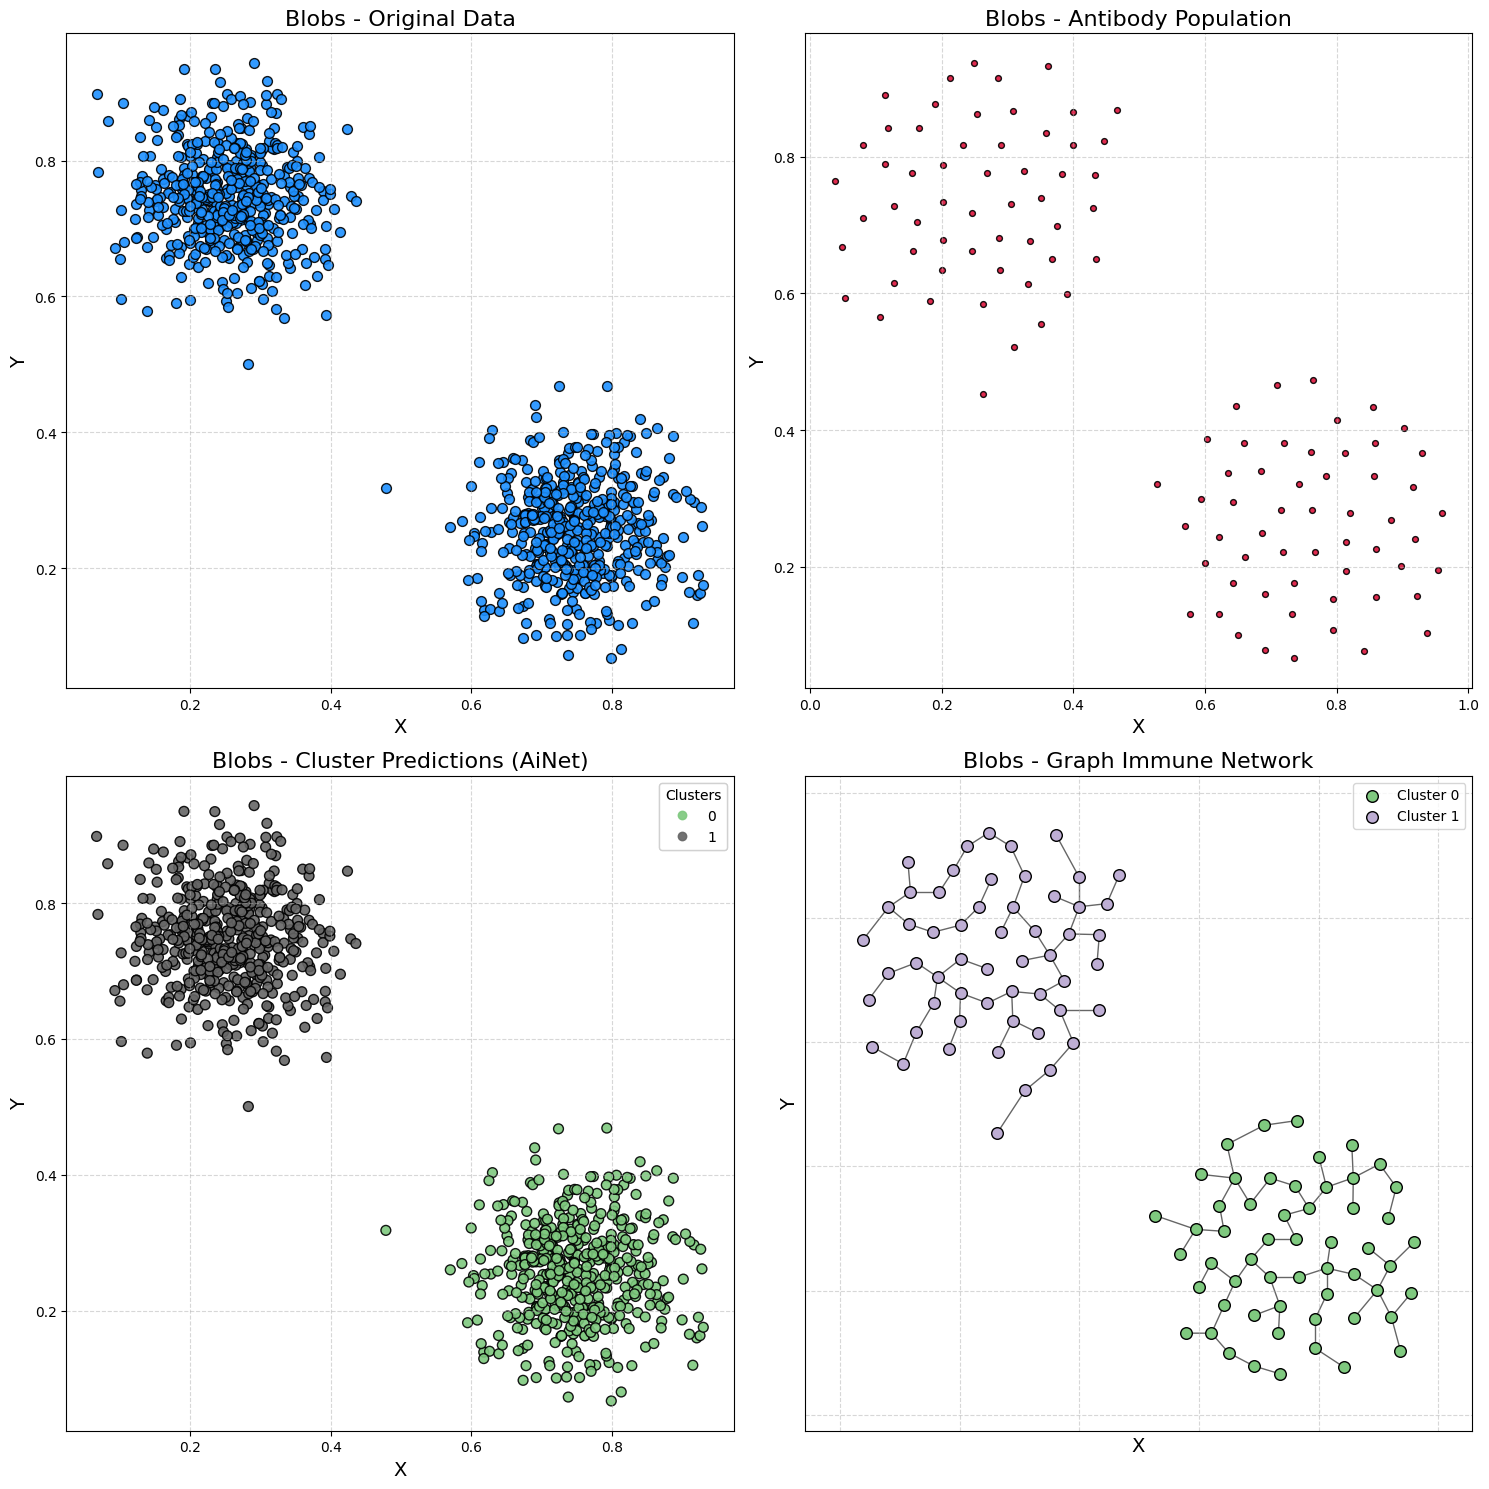

In [16]:
plot_immune_network(samples, predict_y, model, title_prefix="Blobs - ")

#### 5. Generating data in "moon" format

Generates a dataset in the format of two intertwined moons.

In [17]:
# Generating samples and outputs for training.
samples, output = make_moons(n_samples=1000, noise=0.05, random_state=42)
samples = MinMaxScaler().fit_transform(samples)

#### 6. Training and visualizing AiNet on the moon data
The model will identify patterns, form clusters, and classify the samples.

In [18]:
model = AiNet(suppression_threshold=0.95, affinity_threshold=0.97)

predict_y = model.fit_predict(samples)

✔ Set of memory antibodies for classes (0, 1) successfully generated:  ┇██████████┇ 10/10 total training interactions


#### 6. Training and Visualizing AiNet on the Moon Data

Displays four graphs: the original data, the antibody population, the clusters predicted by AiNet, and the graph of the formed immune network.

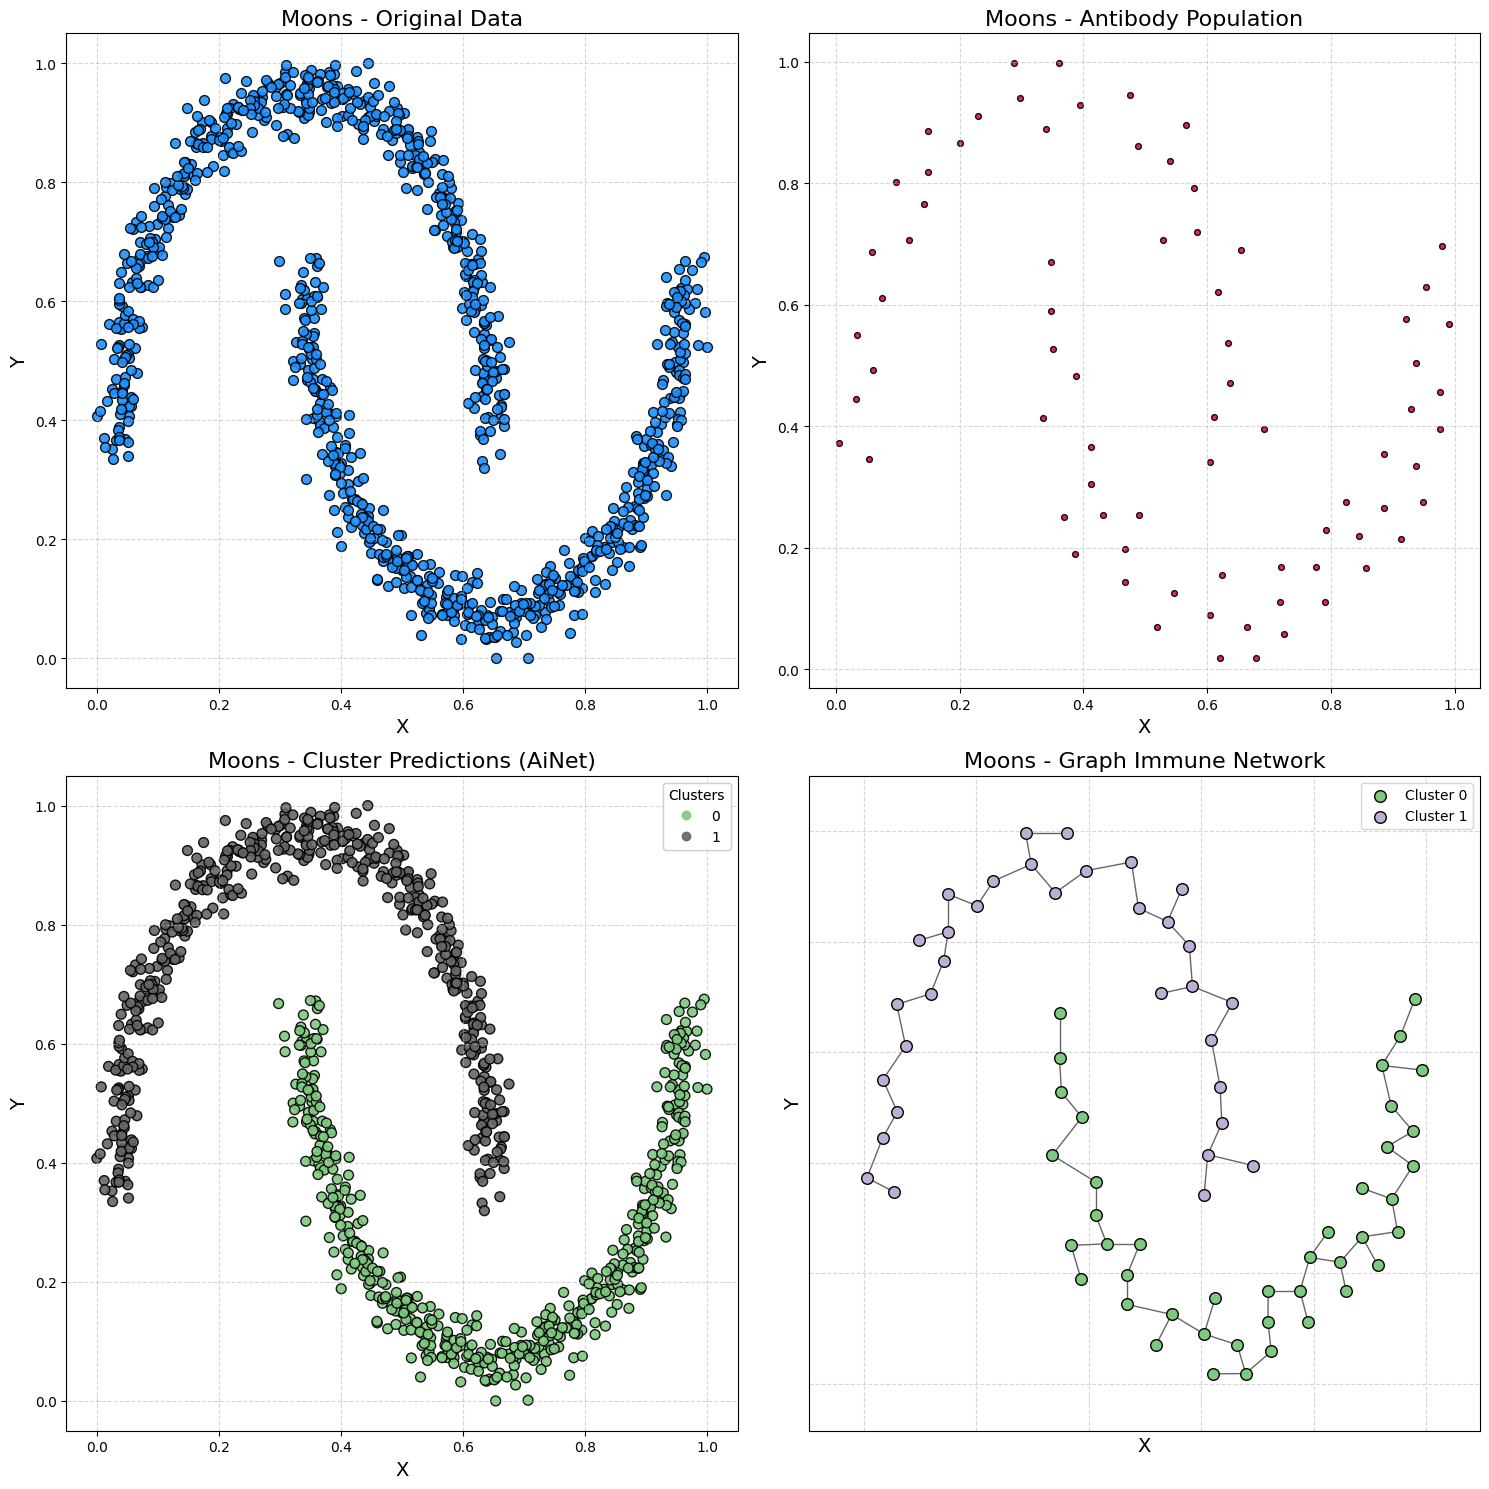

In [19]:
plot_immune_network(samples, predict_y, model, title_prefix="Moons - ")

#### 7. Generating data in the form of concentric circles

Using `make_circles` to create data in two circles.

In [20]:
# Generating samples and outputs for training.
samples, output = make_circles(n_samples=1000, noise=0.05, factor=0.5)
samples = MinMaxScaler().fit_transform(samples)

#### 8. Treinando e visualizando o AiNet nos dados de "circles"
O modelo irá identificar padrões e formar clusters e classificar as amostras.

In [21]:
model = AiNet(suppression_threshold=0.97, affinity_threshold=0.98)

predict_y = model.fit_predict(samples)

✔ Set of memory antibodies for classes (0, 1) successfully generated:  ┇██████████┇ 10/10 total training interactions


#### 9. Visualizing AiNet on Circle Data

Displays four graphs: the original data, the antibody population, the clusters predicted by AiNet, and the graph of the formed immune network.

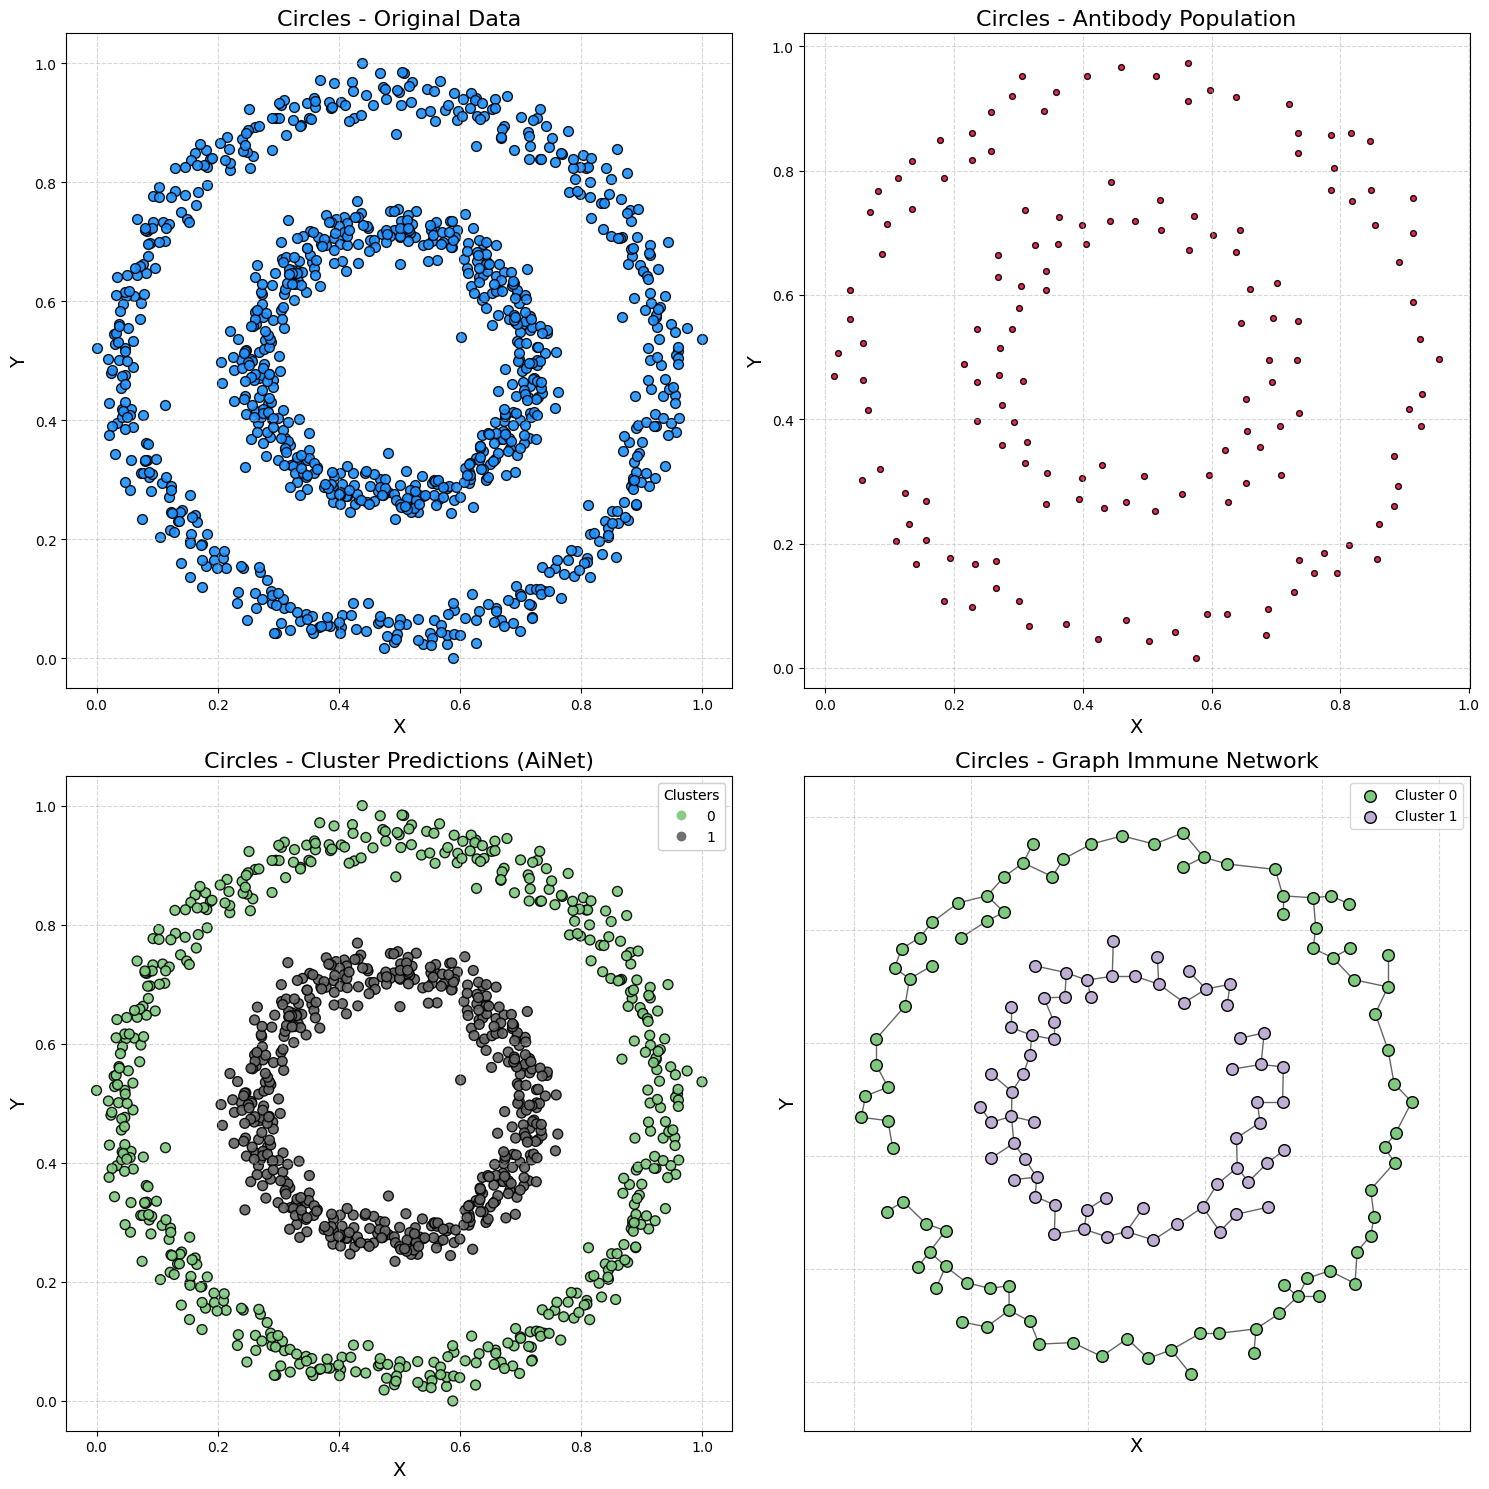

In [22]:
plot_immune_network(samples, predict_y, model, title_prefix="Circles - ")